# 🔍 Anomaly Detection in System Logs (Google Colab Version)

This notebook helps identify anomalies in uploaded system logs using Isolation Forest.

## 📂 Step 1: Upload Your CSV File

In [2]:

from google.colab import files
uploaded = files.upload()

# Automatically grab the filename
import io
import pandas as pd

filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("✅ File loaded successfully.")
df.head()


Saving complex_system_log.csv to complex_system_log.csv
✅ File loaded successfully.


,timestamp,event_count,log_level,source_ip,module
0,2025-01-01 00:00:00,11,ERROR,192.168.1.42,payment
1,2025-01-01 00:30:00,11,INFO,192.168.1.41,reporting
2,2025-01-01 01:00:00,11,ERROR,192.168.1.9,reporting
3,2025-01-01 01:30:00,8,WARN,192.168.1.8,data_ingest
4,2025-01-01 02:00:00,11,ERROR,192.168.1.12,auth


## 📊 Step 2: Visualize Event Counts

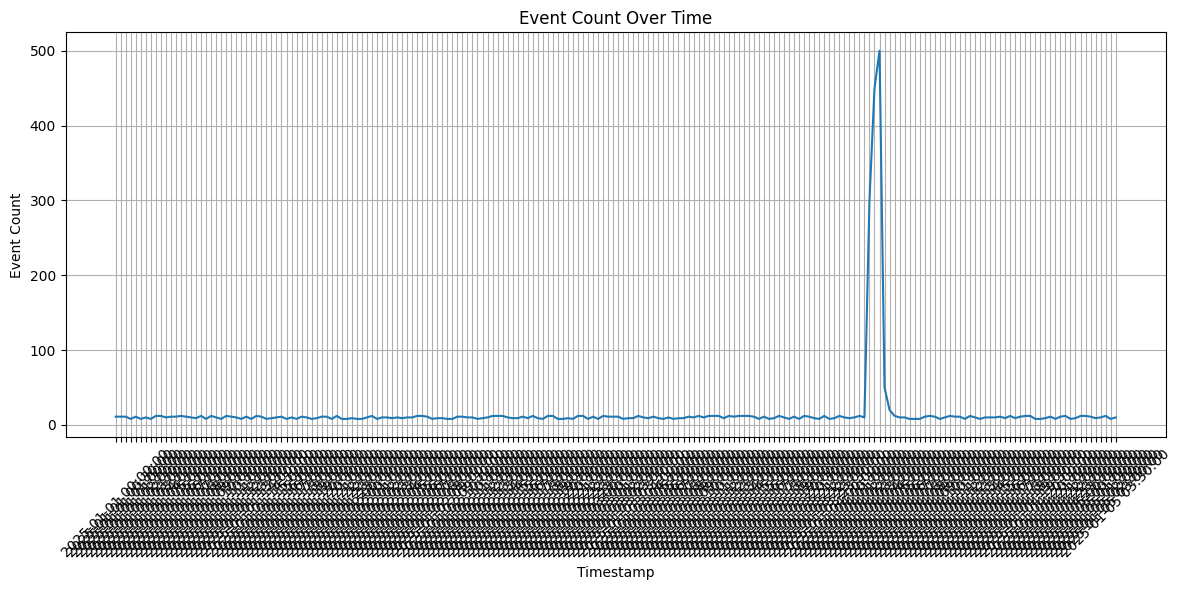

In [3]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['event_count'])
plt.title('Event Count Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## 🤖 Step 3: Apply Isolation Forest for Anomaly Detection

In [4]:

from sklearn.ensemble import IsolationForest

# Parse timestamp if needed
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Fit Isolation Forest on event count
model = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(df[['event_count']])

# -1 = anomaly, 1 = normal
df['is_anomaly'] = df['anomaly'] == -1
df[['timestamp', 'event_count', 'is_anomaly']].tail()


,timestamp,event_count,is_anomaly
195,2025-01-05 01:30:00,9,False
196,2025-01-05 02:00:00,10,False
197,2025-01-05 02:30:00,12,False
198,2025-01-05 03:00:00,8,False
199,2025-01-05 03:30:00,10,False


## 📈 Step 4: Plot Detected Anomalies

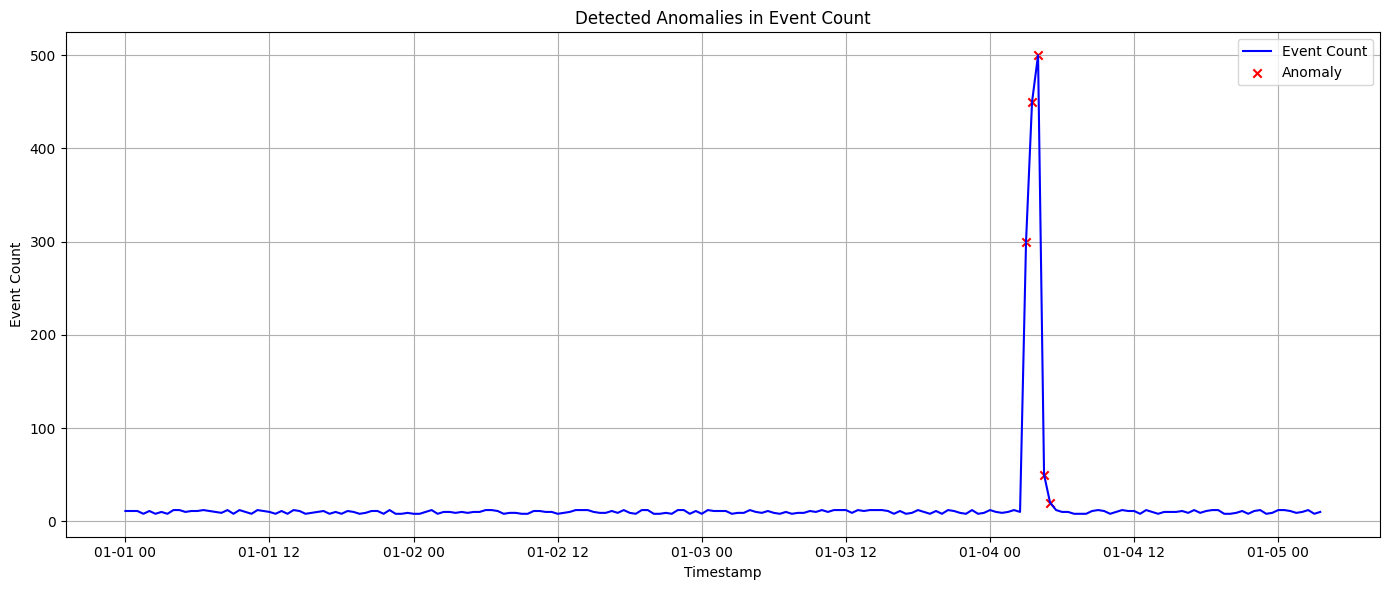

In [5]:

plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['event_count'], label='Event Count', color='blue')
plt.scatter(df[df['is_anomaly']]['timestamp'], df[df['is_anomaly']]['event_count'],
            color='red', label='Anomaly', marker='x')
plt.title("Detected Anomalies in Event Count")
plt.xlabel("Timestamp")
plt.ylabel("Event Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
